In [132]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 


# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# plotting and plot stying
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('seaborn')
#sns.set_style("whitegrid", {'axes.grid' : False})
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"


# statistical modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_model


# deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model 


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image

# Artificial Neural Networks for Time Series Forecasting

<strong>Artificial neural networks (ANNs)</strong> are computing systems inspired by the biological neural networks that constitute bilological brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming (if-then clauses).

An ANN is based on a collection of connected units called <strong>artificial neurons</strong>, (analogous to axons in a biological brain). Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.

Neurons may have state, generally represented by real numbers, typically between 0 and 1. Neurons and synapses may also have a weight that varies as learning proceeds, which can increase or decrease the strength of the signal that it sends downstream. Further, they may have a threshold such that only if the aggregate signal is below (or above) that level is the downstream signal sent. - <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>


## A Supervised Learning Task

Time series prediction problems are inherently different from supervised learning problems in that obervastions posses a timely ordering and no observeable input. Thus, the time series prediction problem has to be converted into a regression problem.

A supervised learing problem requires data of the form $(y, X)$ where $y$ is the observeable output and $X$ is a matrix of input data which is assumed to cause the observed output. Since the output variable $y$ is assumed to be continuous this problem is called a supervised regression problem.




In [5]:
np.random.seed(7)

In [6]:
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values

# using keras often requires the data type float32
data = data.astype('float32')

# slice the data
train = data[0:120, :]
test = data[120:, :]

print(len(train), len(test))

120 24


The <code>create_data</code> function will be used to transform the time series into a regression problem. The <code>lags</code> argument takes an integer which corresponds the the number of previous time steps to use as input variables to predict the next time period. The default value is one but will be changed in a next iteration.

With the default setting a data set will be created where $X$ is the number of passengers at time $t$ and $y$ is the number of passengers at time 4t+1$.

In [141]:
def create_data(data, lags=1):
    """
    Create lagged data from an input time series
    """
    X_data, y_data = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X_data.append(a)
        y_data.append(data[row + lags, 0])
    return np.array(X_data), np.array(y_data)

In [142]:
lags = 1
X_train, y_train = create_data(train, lags)
X_test, y_test = create_data(test, lags)
y_true = y_test     # due to naming convention

In [143]:
#X_data, y_data = create_data(data, lags)

In [144]:
#X_train, X_test = X_data[:120], X_data[120:]
#y_train, y_test = y_data[:120], y_data[120:]

In [145]:
X_train

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [146]:
y_train

array([ 118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,
        104.,  118.,  115.,  126.,  141.,  135.,  125.,  149.,  170.,
        170.,  158.,  133.,  114.,  140.,  145.,  150.,  178.,  163.,
        172.,  178.,  199.,  199.,  184.,  162.,  146.,  166.,  171.,
        180.,  193.,  181.,  183.,  218.,  230.,  242.,  209.,  191.,
        172.,  194.,  196.,  196.,  236.,  235.,  229.,  243.,  264.,
        272.,  237.,  211.,  180.,  201.,  204.,  188.,  235.,  227.,
        234.,  264.,  302.,  293.,  259.,  229.,  203.,  229.,  242.,
        233.,  267.,  269.,  270.,  315.,  364.,  347.,  312.,  274.,
        237.,  278.,  284.,  277.,  317.,  313.,  318.,  374.,  413.,
        405.,  355.,  306.,  271.], dtype=float32)

The data set now has the following form
<pre>
X       y
112     118
118     132
132     129
129     121
121     135
</pre>
That is, the function has successfully shifted the data for one time step and saved this new shifted series to an array.

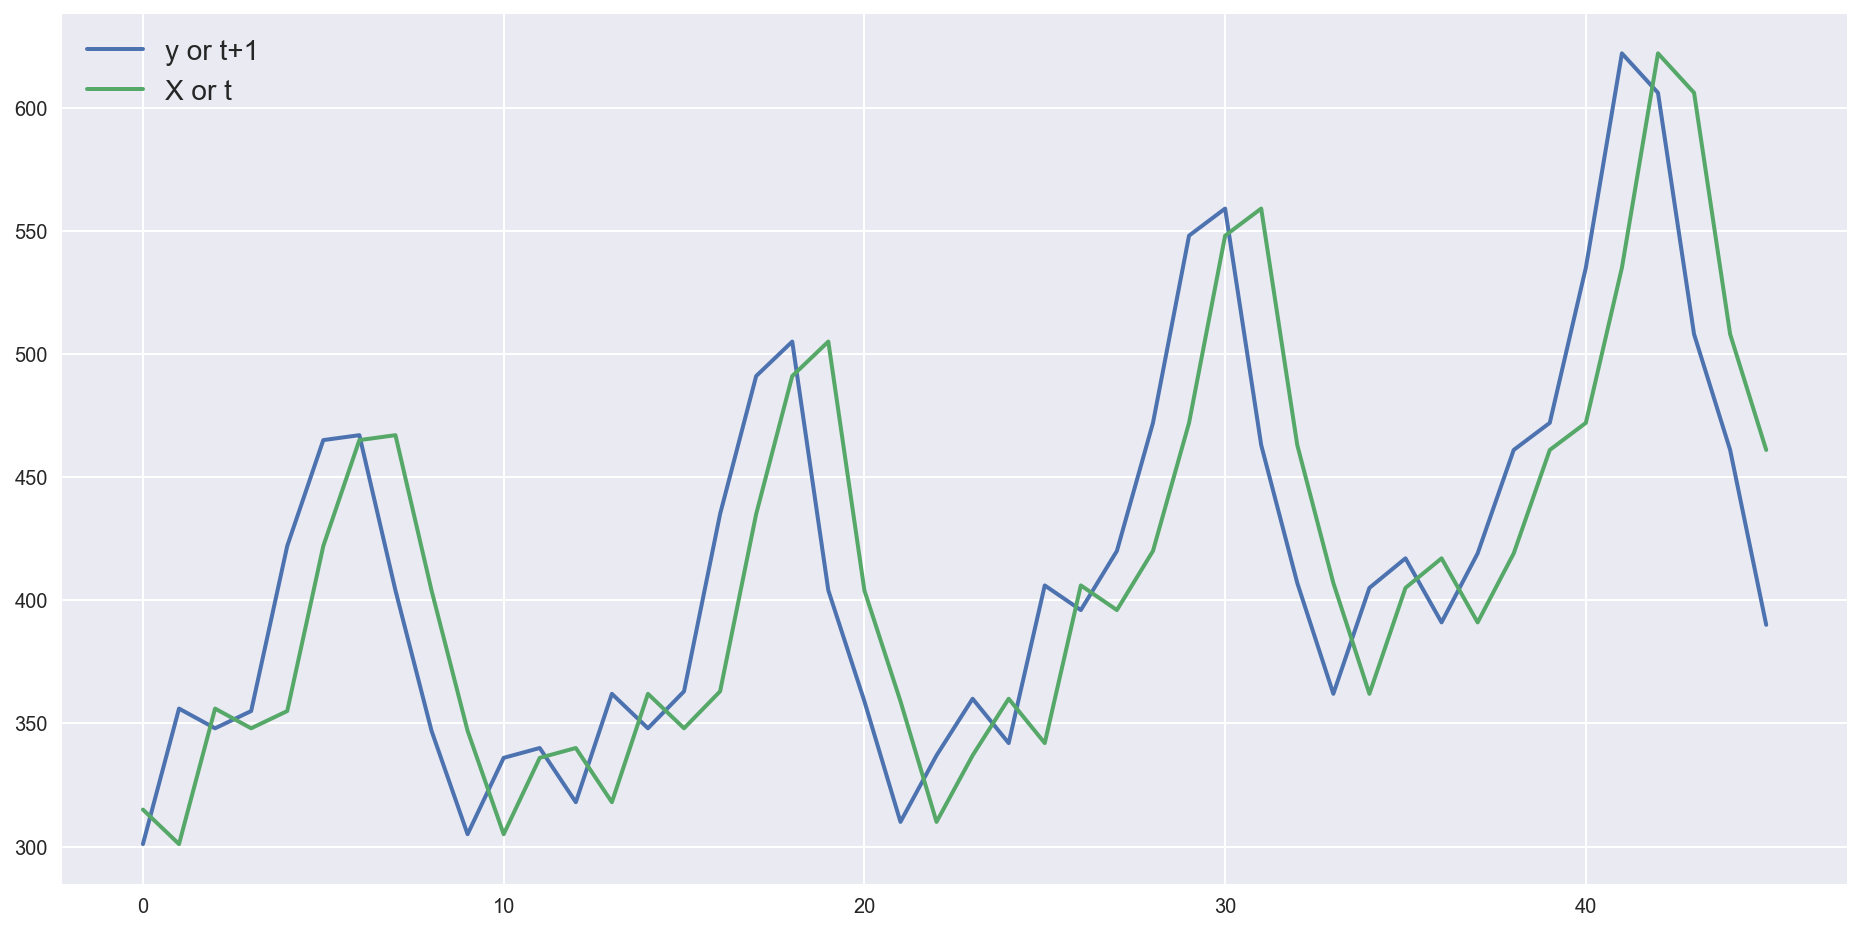

In [148]:
# plot the created data
plt.plot(y_test, label='y or t+1')
plt.plot(X_test, label='X or t')
plt.legend()
plt.show()

## The Perceptron

The very basic ingredient of any artificial neural network is the artificial neuron. They are not only named after their biological counterparts but also are modeled after the behavior of the neurons in our brain.



## Multilayer Perceptron Network

As previously, the data is sliced up into a <code>train</code> and <code>test</code> set to evaluate the performance of a two-year-ahead forecast.


The first simple entwork will have one input (size of the <code>look_bacl</code> variable), one hidden layer with 8 neurons and an output layer. The model is fitted using the MSE criterion and rectified linear units as activation function

In [90]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(8, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 38637.6882
Epoch 2/200
0s - loss: 22428.6020
Epoch 3/200
0s - loss: 12099.7258
Epoch 4/200
0s - loss: 6027.9298
Epoch 5/200
0s - loss: 2988.9780
Epoch 6/200
0s - loss: 1688.0802
Epoch 7/200
0s - loss: 1129.5917
Epoch 8/200
0s - loss: 920.5529
Epoch 9/200
0s - loss: 848.7596
Epoch 10/200
0s - loss: 831.5936
Epoch 11/200
0s - loss: 835.2532
Epoch 12/200
0s - loss: 828.5263
Epoch 13/200
0s - loss: 832.7316
Epoch 14/200
0s - loss: 834.7539
Epoch 15/200
0s - loss: 833.4577
Epoch 16/200
0s - loss: 829.5685
Epoch 17/200
0s - loss: 828.0323
Epoch 18/200
0s - loss: 832.2428
Epoch 19/200
0s - loss: 834.3289
Epoch 20/200
0s - loss: 830.4947
Epoch 21/200
0s - loss: 827.4780
Epoch 22/200
0s - loss: 831.8091
Epoch 23/200
0s - loss: 838.3291
Epoch 24/200
0s - loss: 839.6120
Epoch 25/200
0s - loss: 832.4097
Epoch 26/200
0s - loss: 830.7346
Epoch 27/200
0s - loss: 841.8412
Epoch 28/200
0s - loss: 839.0494
Epoch 29/200
0s - loss: 833.7260
Epoch 30/200
0s - loss: 829.1571
Epoch 31/

In [91]:
# estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 817.47 MSE (28.59 RMSE)
Test Score: 2803.47 MSE (52.95 RMSE)


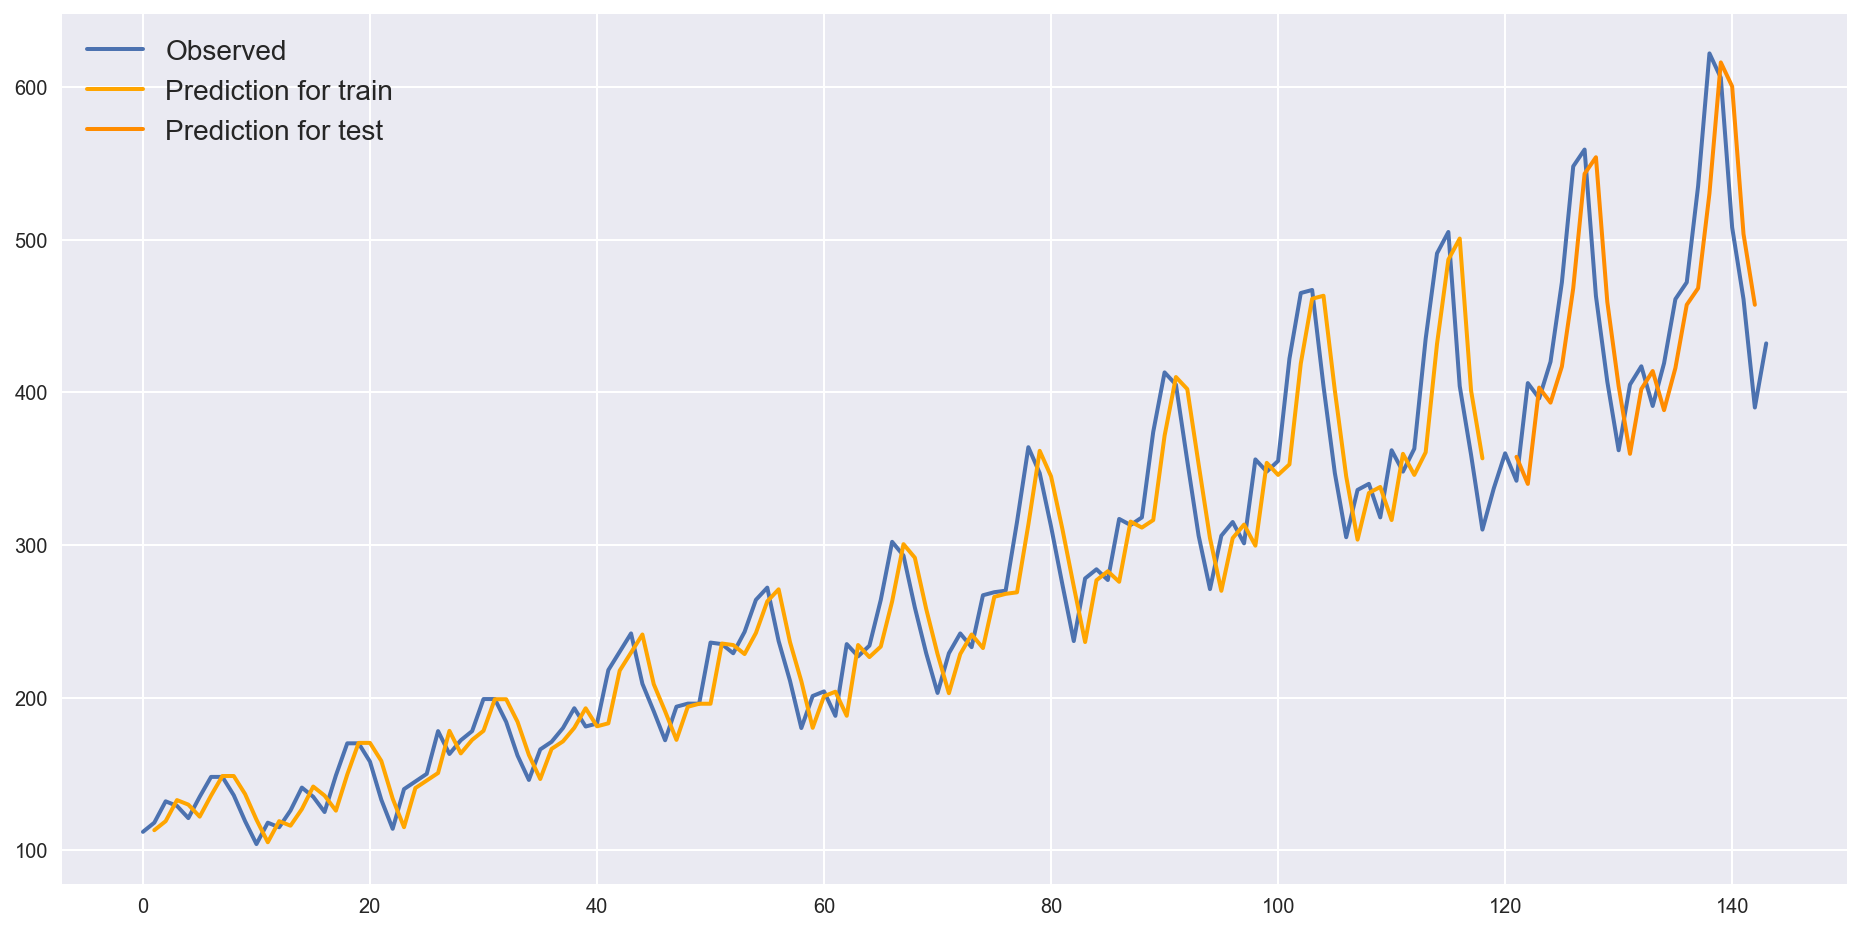

In [93]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data, label='Observed');
plt.plot(train_predict_plot, label='Prediction for train', color='orange');
plt.plot(test_predict_plot, label='Prediction for test', color='darkorange');
plt.legend(loc='best');
plt.show()

In [94]:
y_test

array([ 342.,  406.,  396.,  420.,  472.,  548.,  559.,  463.,  407.,
        362.,  405.,  417.,  391.,  419.,  461.,  472.,  535.,  622.,
        606.,  508.,  461.,  390.], dtype=float32)

In [95]:
test_predict

array([[ 357.68179],
       [ 339.92819],
       [ 403.05215],
       [ 393.18903],
       [ 416.86053],
       [ 468.14871],
       [ 543.1084 ],
       [ 553.95776],
       [ 459.27194],
       [ 404.03845],
       [ 359.65445],
       [ 402.06583],
       [ 413.90155],
       [ 388.25751],
       [ 415.87418],
       [ 457.29929],
       [ 468.14871],
       [ 530.28632],
       [ 616.09546],
       [ 600.31445],
       [ 503.65598],
       [ 457.29929]], dtype=float32)

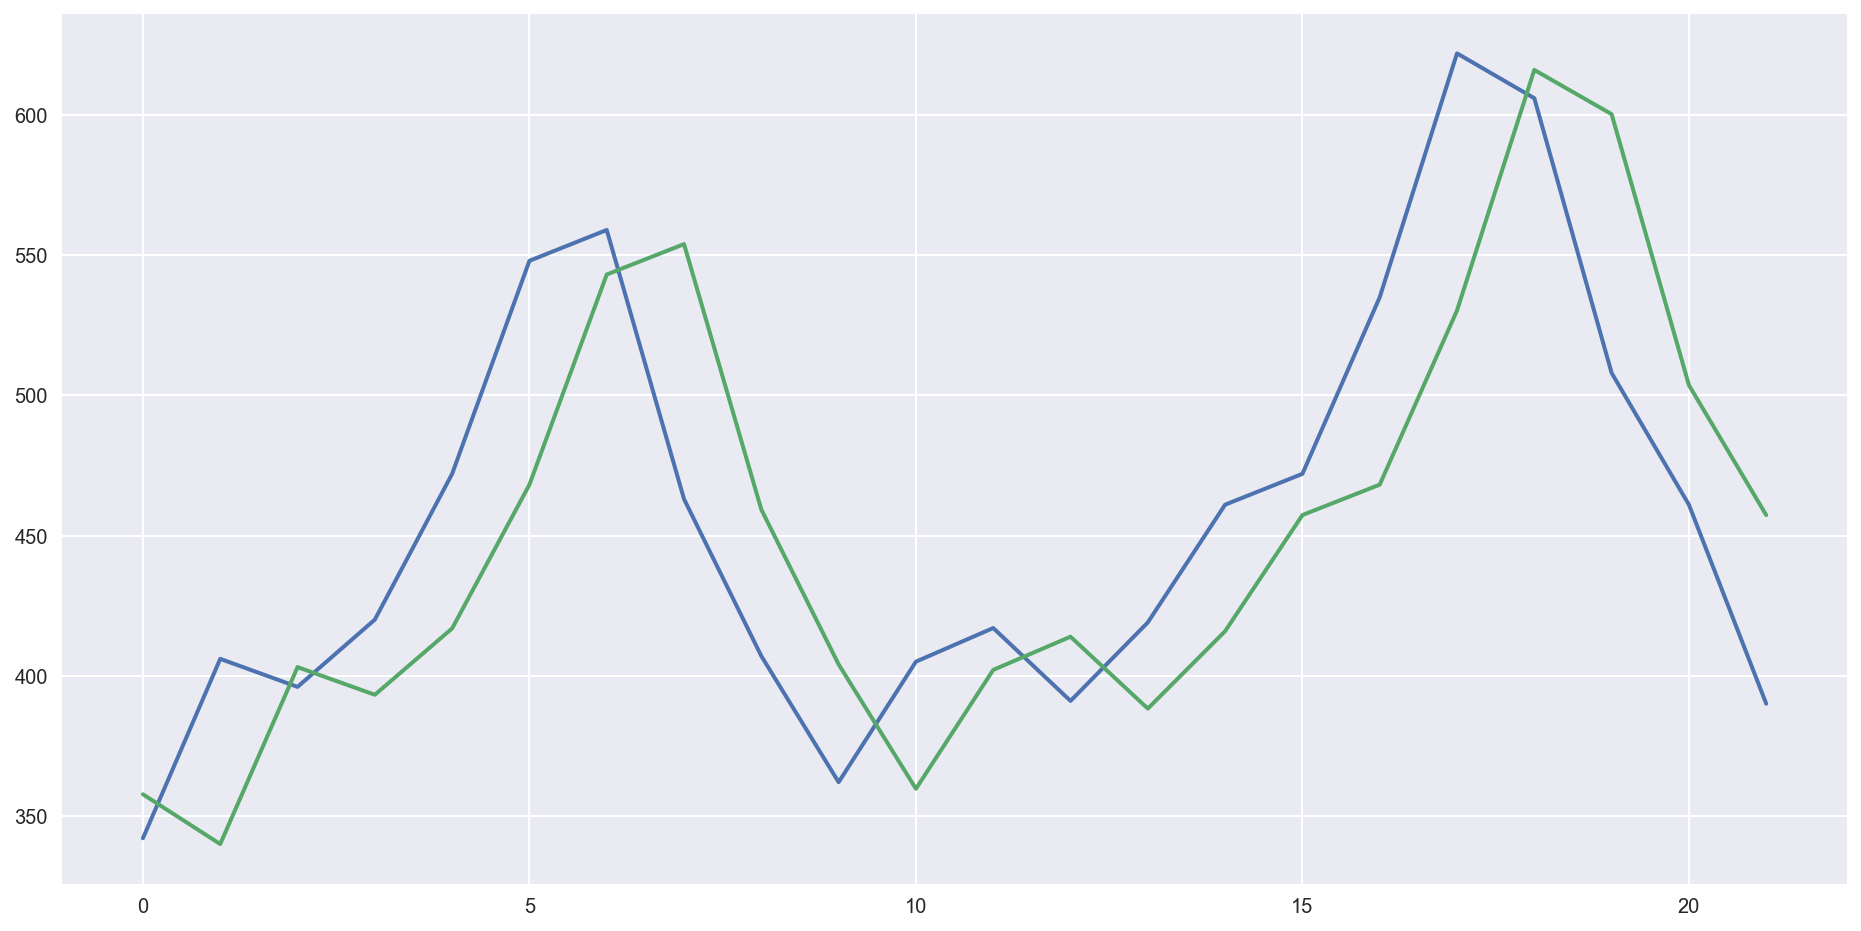

In [96]:
plt.plot(y_test)
plt.plot(test_predict)
plt.show()

In [97]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

11392.1
106.7337471160715


Since the neural network has only been fed by the last observation, it did not have much choice but to learn to apply observation $t$ for the prediction of $t+1$.

## Multilayer perceptron with window

In [98]:
# reshape dataset
lags = 3
X_train, y_train = create_data(train, lags)
X_test, y_test = create_data(test, lags)

In [99]:
len(y_train)

116

In [100]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(12, input_dim=lags, activation='relu'))
mdl.add(Dense(8, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
0s - loss: 59920.6984
Epoch 2/400
0s - loss: 17149.6547
Epoch 3/400
0s - loss: 2112.1637
Epoch 4/400
0s - loss: 1367.2453
Epoch 5/400
0s - loss: 1320.0948
Epoch 6/400
0s - loss: 1319.5368
Epoch 7/400
0s - loss: 1292.8918
Epoch 8/400
0s - loss: 1305.2387
Epoch 9/400
0s - loss: 1281.5572
Epoch 10/400
0s - loss: 1287.5422
Epoch 11/400
0s - loss: 1307.7737
Epoch 12/400
0s - loss: 1329.8361
Epoch 13/400
0s - loss: 1320.6188
Epoch 14/400
0s - loss: 1304.3458
Epoch 15/400
0s - loss: 1261.7063
Epoch 16/400
0s - loss: 1324.7150
Epoch 17/400
0s - loss: 1287.3161
Epoch 18/400
0s - loss: 1253.2253
Epoch 19/400
0s - loss: 1282.6782
Epoch 20/400
0s - loss: 1264.0784
Epoch 21/400
0s - loss: 1299.7397
Epoch 22/400
0s - loss: 1231.1341
Epoch 23/400
0s - loss: 1238.5876
Epoch 24/400
0s - loss: 1240.7071
Epoch 25/400
0s - loss: 1272.8569
Epoch 26/400
0s - loss: 1265.1149
Epoch 27/400
0s - loss: 1219.8771
Epoch 28/400
0s - loss: 1235.2360
Epoch 29/400
0s - loss: 1208.8051
Epoch 30/400
0s - los

0s - loss: 754.4304
Epoch 243/400
0s - loss: 775.4818
Epoch 244/400
0s - loss: 769.9656
Epoch 245/400
0s - loss: 825.0357
Epoch 246/400
0s - loss: 819.4557
Epoch 247/400
0s - loss: 863.7984
Epoch 248/400
0s - loss: 788.2604
Epoch 249/400
0s - loss: 801.7440
Epoch 250/400
0s - loss: 775.1091
Epoch 251/400
0s - loss: 780.3252
Epoch 252/400
0s - loss: 753.2049
Epoch 253/400
0s - loss: 775.2934
Epoch 254/400
0s - loss: 762.6308
Epoch 255/400
0s - loss: 790.5033
Epoch 256/400
0s - loss: 764.4483
Epoch 257/400
0s - loss: 792.2217
Epoch 258/400
0s - loss: 761.6100
Epoch 259/400
0s - loss: 804.4866
Epoch 260/400
0s - loss: 770.6667
Epoch 261/400
0s - loss: 774.4809
Epoch 262/400
0s - loss: 738.6383
Epoch 263/400
0s - loss: 816.2465
Epoch 264/400
0s - loss: 751.3350
Epoch 265/400
0s - loss: 757.7360
Epoch 266/400
0s - loss: 776.7482
Epoch 267/400
0s - loss: 779.2091
Epoch 268/400
0s - loss: 761.8885
Epoch 269/400
0s - loss: 763.6217
Epoch 270/400
0s - loss: 825.0592
Epoch 271/400
0s - loss: 787

In [101]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 741.65 MSE (27.23 RMSE)
Test Score: 2254.48 MSE (47.48 RMSE)


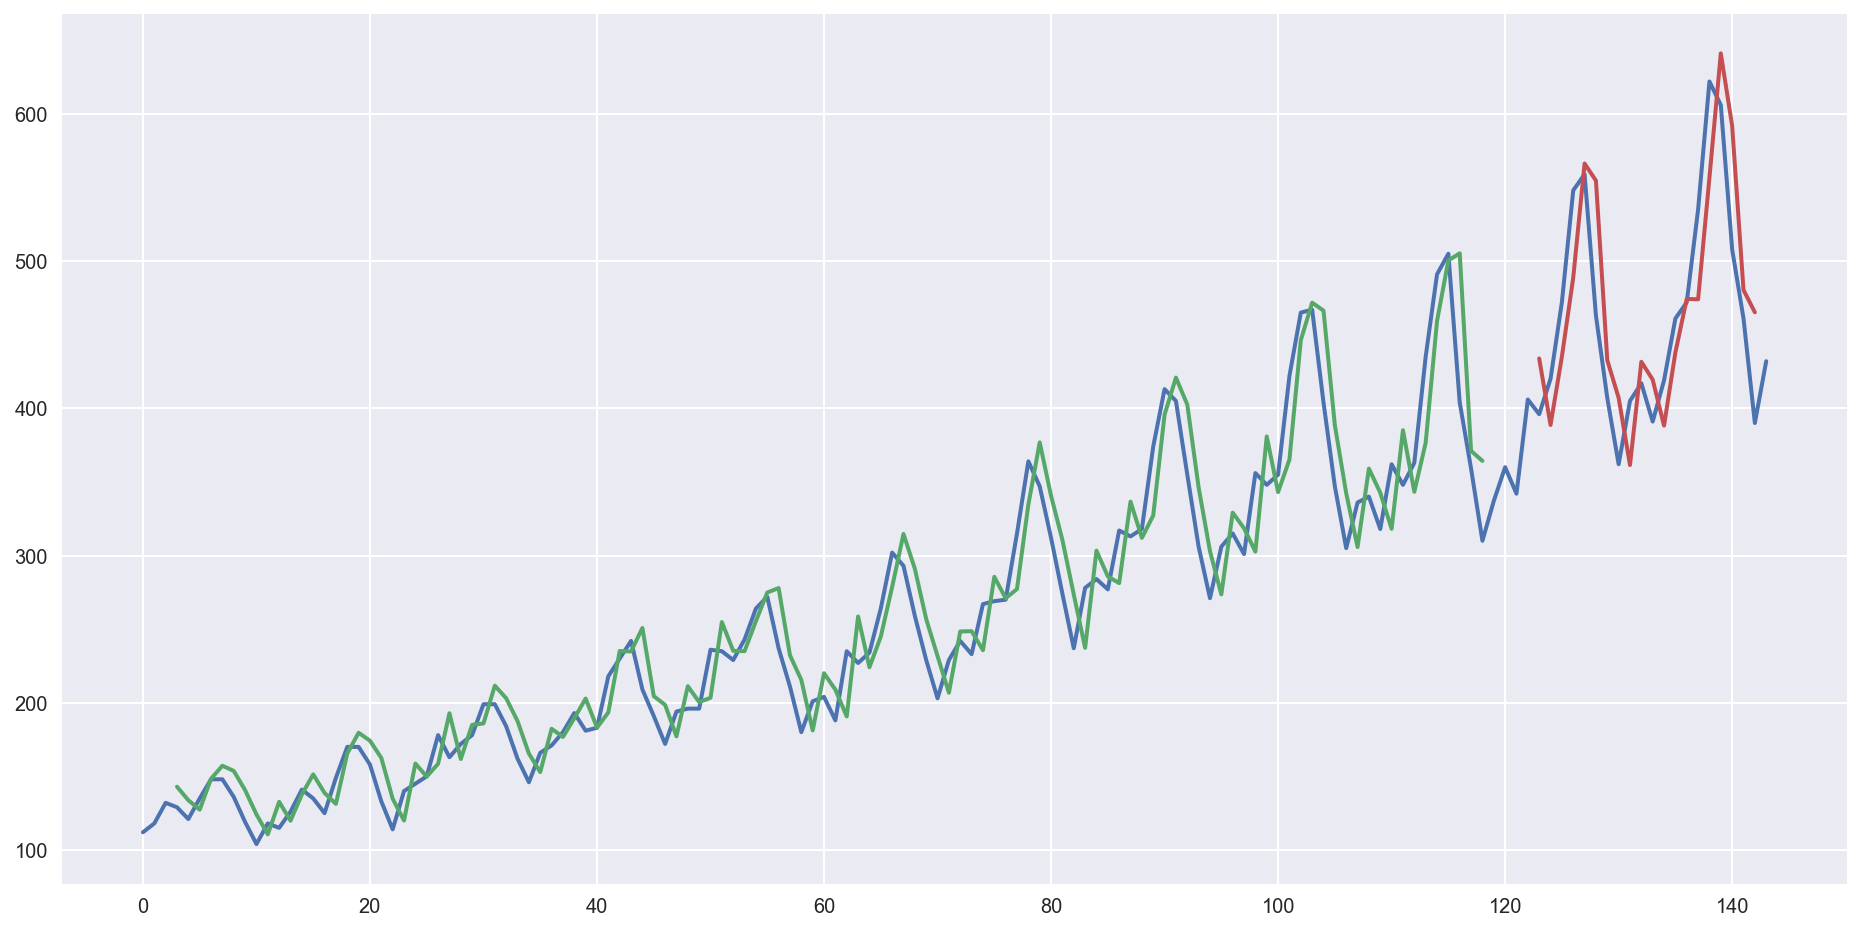

In [103]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags * 2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data);
plt.plot(train_predict_plot);
plt.plot(test_predict_plot);
plt.show()

In [107]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

10713.1
103.50432131679334


In [108]:
y_test

array([ 396.,  420.,  472.,  548.,  559.,  463.,  407.,  362.,  405.,
        417.,  391.,  419.,  461.,  472.,  535.,  622.,  606.,  508.,
        461.,  390.], dtype=float32)

In [110]:
test_predict

array([[ 433.84158],
       [ 388.66971],
       [ 435.05212],
       [ 488.77972],
       [ 566.29224],
       [ 554.65643],
       [ 432.6485 ],
       [ 407.1037 ],
       [ 361.47409],
       [ 431.60486],
       [ 419.44196],
       [ 388.22321],
       [ 437.97601],
       [ 474.31128],
       [ 474.04037],
       [ 556.82178],
       [ 641.09631],
       [ 591.84857],
       [ 480.36548],
       [ 465.21008]], dtype=float32)

In [136]:
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = pd.read_csv('./data/passengers.csv', usecols=[1], engine='python', sep=';')
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



Epoch 1/400
0s - loss: 95542.1419
Epoch 2/400
0s - loss: 51048.4508
Epoch 3/400
0s - loss: 28515.9379
Epoch 4/400
0s - loss: 12603.8432
Epoch 5/400
0s - loss: 4014.8494
Epoch 6/400
0s - loss: 1603.3630
Epoch 7/400
0s - loss: 1214.3747
Epoch 8/400
0s - loss: 1179.9691
Epoch 9/400
0s - loss: 1161.6071
Epoch 10/400
0s - loss: 1154.5011
Epoch 11/400
0s - loss: 1167.4138
Epoch 12/400
0s - loss: 1157.4331
Epoch 13/400
0s - loss: 1135.1907
Epoch 14/400
0s - loss: 1139.4047
Epoch 15/400
0s - loss: 1143.3459
Epoch 16/400
0s - loss: 1133.3584
Epoch 17/400
0s - loss: 1122.0856
Epoch 18/400
0s - loss: 1124.5418
Epoch 19/400
0s - loss: 1128.7468
Epoch 20/400
0s - loss: 1105.5355
Epoch 21/400
0s - loss: 1104.6774
Epoch 22/400
0s - loss: 1106.4146
Epoch 23/400
0s - loss: 1101.6791
Epoch 24/400
0s - loss: 1129.9315
Epoch 25/400
0s - loss: 1111.0965
Epoch 26/400
0s - loss: 1101.9836
Epoch 27/400
0s - loss: 1086.7264
Epoch 28/400
0s - loss: 1079.9732
Epoch 29/400
0s - loss: 1095.9780
Epoch 30/400
0s - l

0s - loss: 526.4633
Epoch 246/400
0s - loss: 517.4336
Epoch 247/400
0s - loss: 508.7318
Epoch 248/400
0s - loss: 510.6003
Epoch 249/400
0s - loss: 506.2667
Epoch 250/400
0s - loss: 539.1497
Epoch 251/400
0s - loss: 541.0622
Epoch 252/400
0s - loss: 540.0311
Epoch 253/400
0s - loss: 543.7607
Epoch 254/400
0s - loss: 520.0692
Epoch 255/400
0s - loss: 523.0221
Epoch 256/400
0s - loss: 507.3085
Epoch 257/400
0s - loss: 545.4844
Epoch 258/400
0s - loss: 513.7229
Epoch 259/400
0s - loss: 509.4942
Epoch 260/400
0s - loss: 562.9688
Epoch 261/400
0s - loss: 560.0073
Epoch 262/400
0s - loss: 505.2379
Epoch 263/400
0s - loss: 515.1119
Epoch 264/400
0s - loss: 510.1184
Epoch 265/400
0s - loss: 504.2490
Epoch 266/400
0s - loss: 548.7596
Epoch 267/400
0s - loss: 503.4988
Epoch 268/400
0s - loss: 535.5647
Epoch 269/400
0s - loss: 511.5191
Epoch 270/400
0s - loss: 499.6596
Epoch 271/400
0s - loss: 515.7853
Epoch 272/400
0s - loss: 503.3161
Epoch 273/400
0s - loss: 504.8345
Epoch 274/400
0s - loss: 495

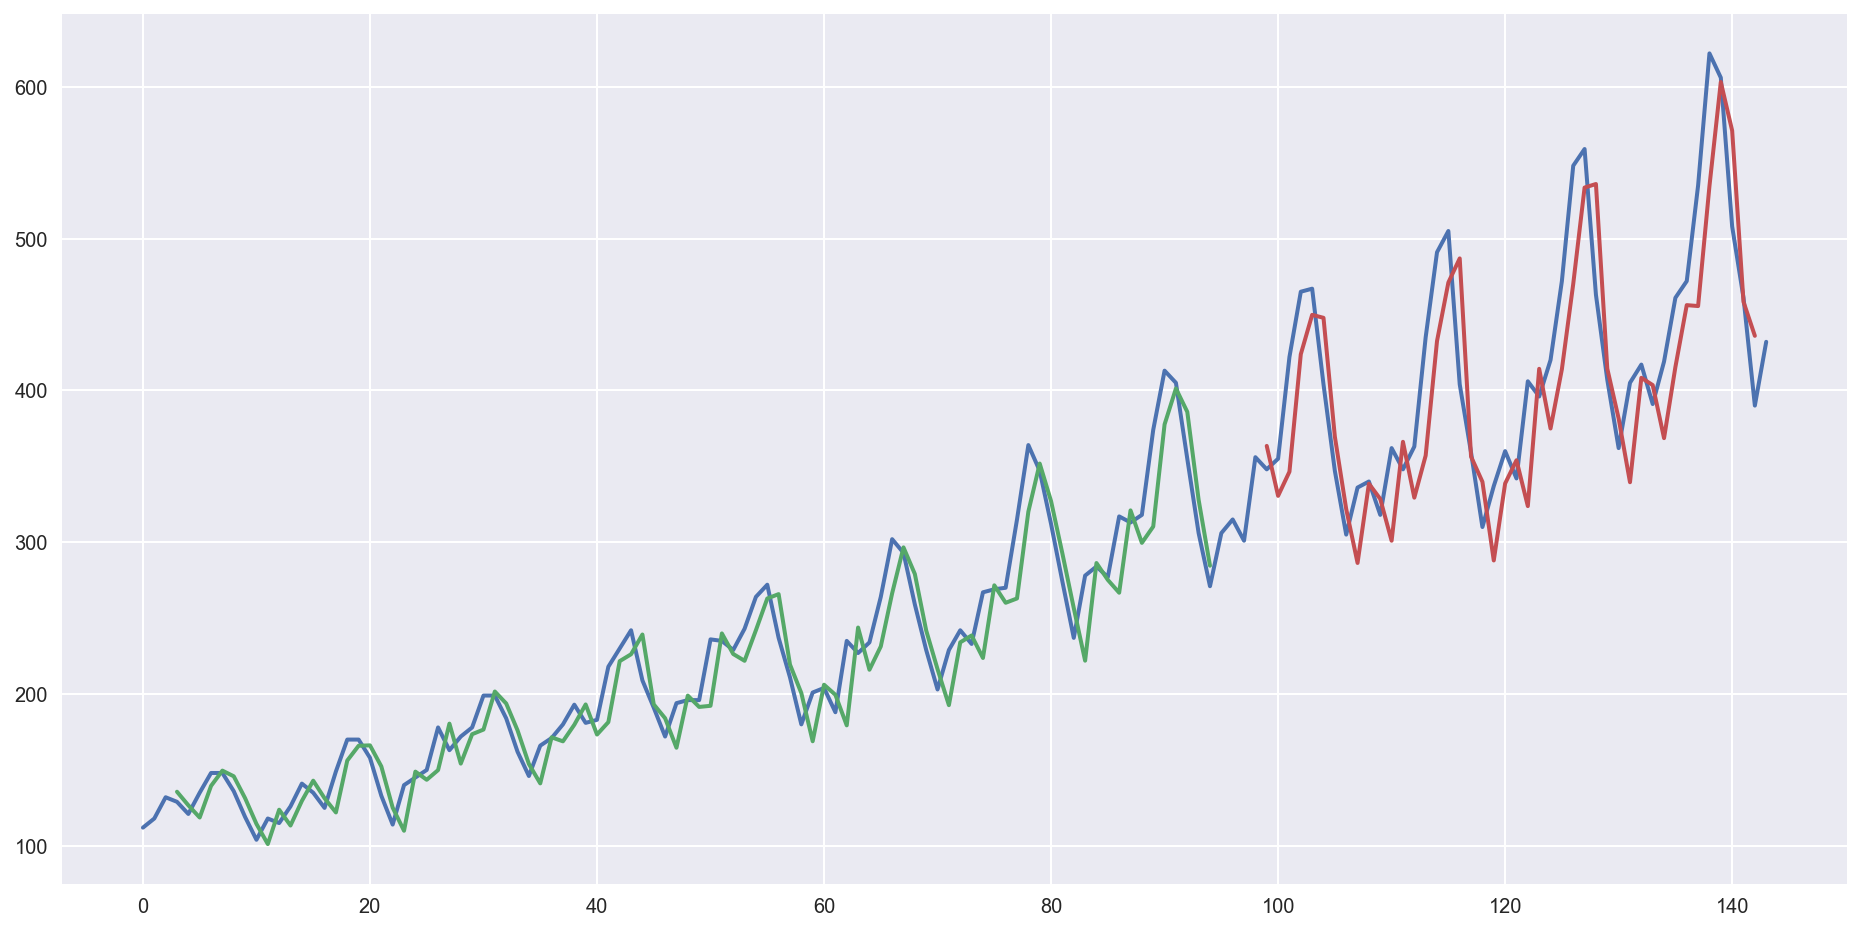

In [139]:
# reshape dataset
lags = 3
trainX, trainY = create_data(train, lags)
testX, testY = create_data(test, lags)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=lags, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lags:len(trainPredict)+lags, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lags*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [140]:
mse = ((testY - testPredict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

11926.9
109.21051023997187


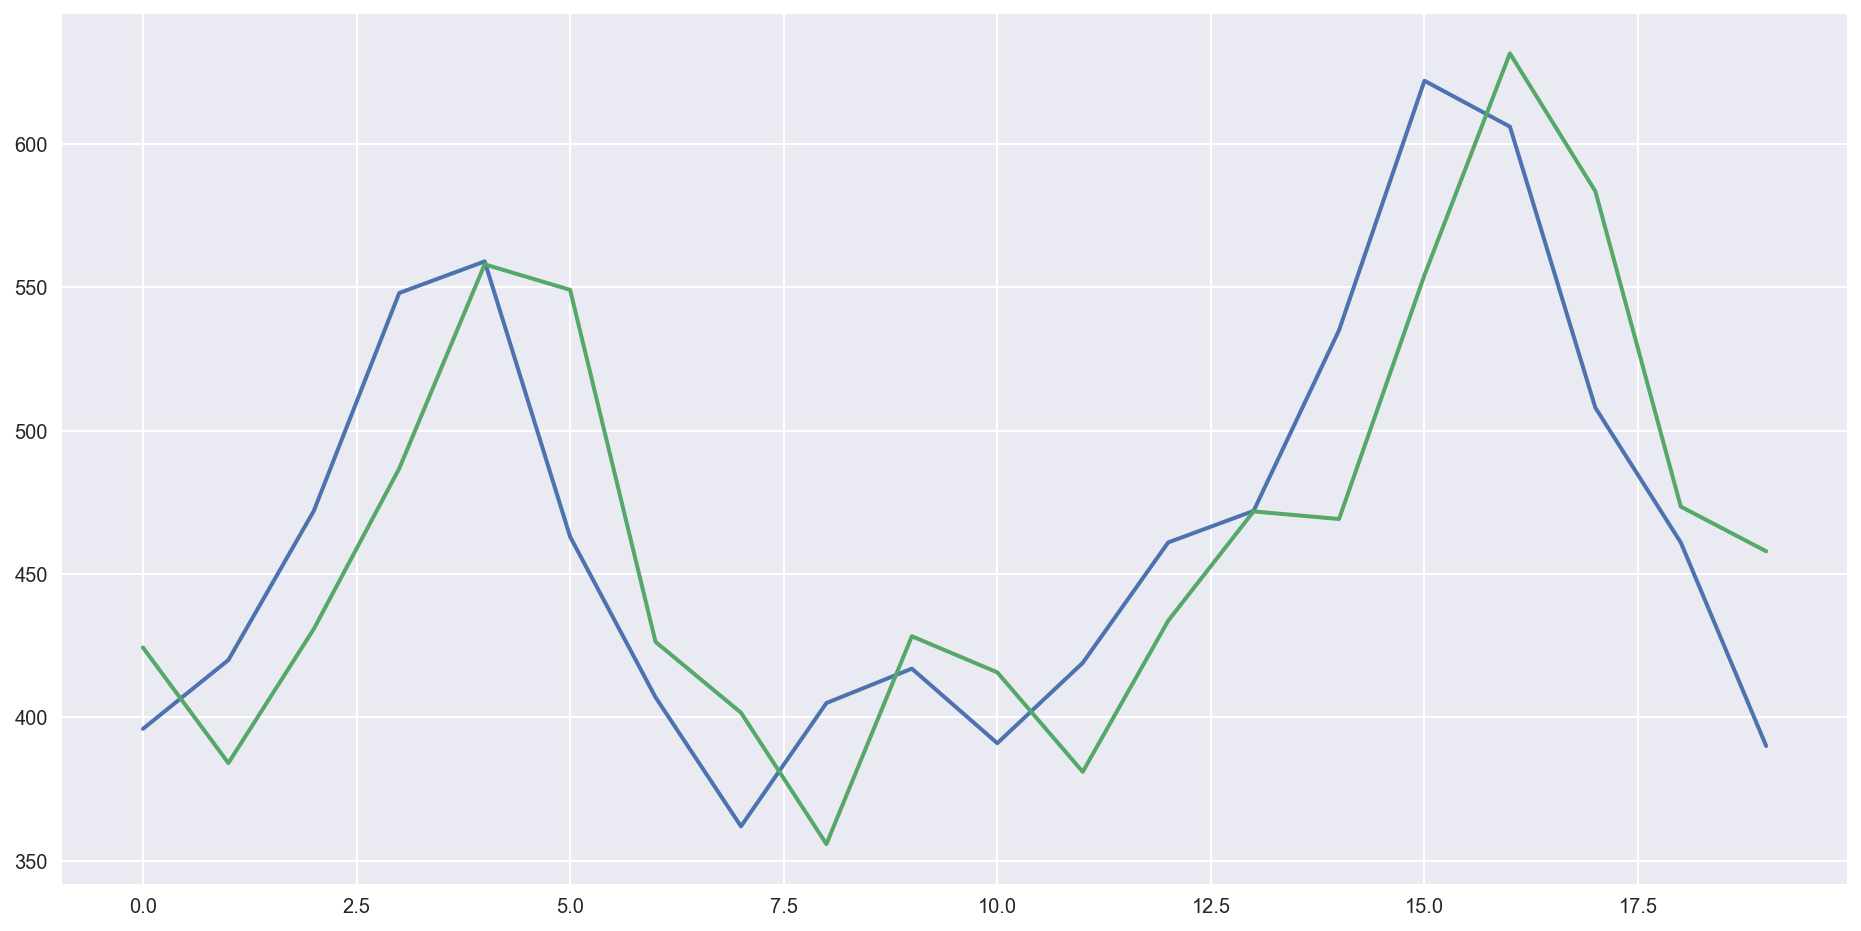

In [133]:
plt.plot(testY)
plt.plot(testPredict)
plt.show()